In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = 'country_wise_latest.csv' 
data = pd.read_csv(file_path)

data.head()
data = data.dropna(subset=['Confirmed', 'Deaths', 'Recovered', 'Active'])


ModuleNotFoundError: No module named 'pandas'

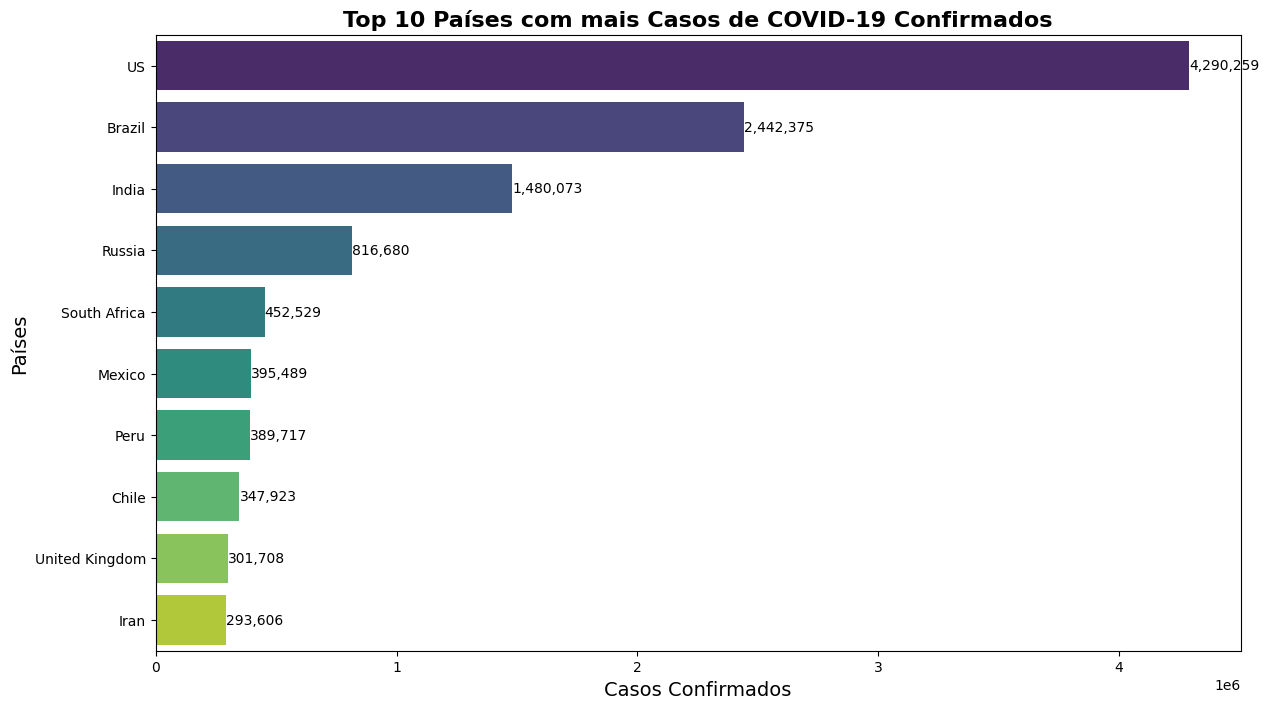

In [4]:
top_10_confirmados = data.nlargest(10, 'Confirmed')

plt.figure(figsize=(14, 8))
sns.barplot(x='Confirmed', y='Country/Region', data=top_10_confirmados, palette="viridis", hue="Country/Region", dodge=False, legend=False)

for indice, valor in enumerate(top_10_confirmados['Confirmed']):
    plt.text(valor, indice, f'{valor:,.0f}', va='center', color='black', fontsize=10)

plt.title("Top 10 Países com mais Casos de COVID-19 Confirmados", fontsize=16, fontweight='bold')
plt.xlabel("Casos Confirmados", fontsize=14)
plt.ylabel("Países", fontsize=14)
plt.show()

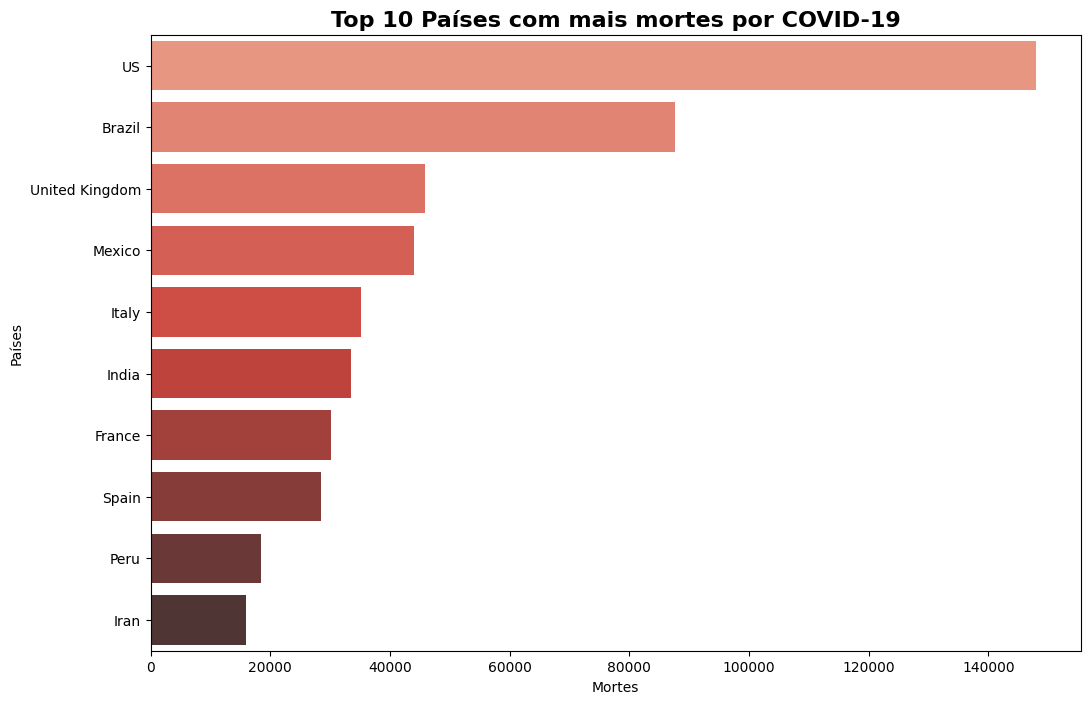

In [5]:
top_10_mortes = data.nlargest(10, 'Deaths')

plt.figure(figsize=(12, 8))
sns.barplot(x='Deaths', y='Country/Region', data=top_10_mortes, palette="Reds_d", hue="Country/Region", dodge=False, legend=False)

plt.title("Top 10 Países com mais mortes por COVID-19", fontsize=16, fontweight='bold')
plt.xlabel("Mortes")
plt.ylabel("Países")
plt.show()

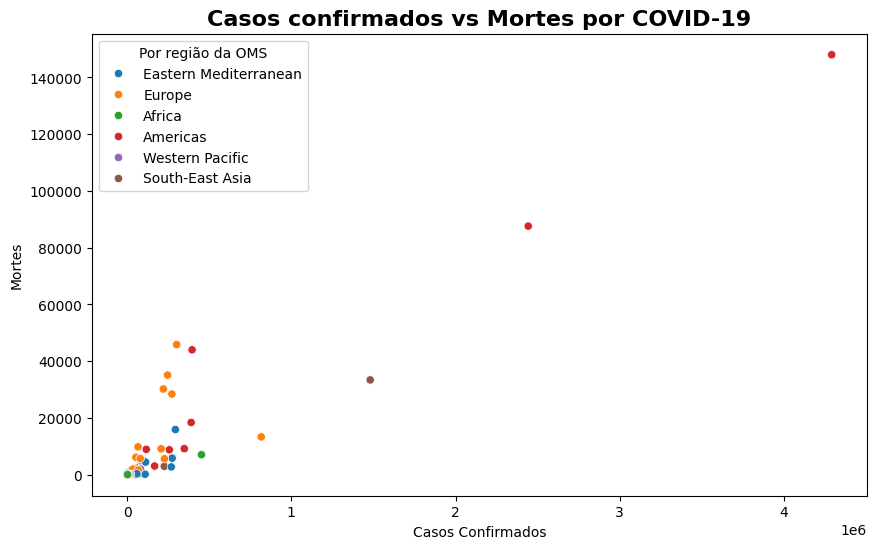

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Confirmed', y='Deaths', hue='WHO Region', data=data)
plt.title("Casos confirmados vs Mortes por COVID-19", fontsize=16, fontweight='bold')
plt.xlabel("Casos Confirmados")
plt.ylabel("Mortes")
plt.legend(loc='upper left', title='Por região da OMS')
plt.show()

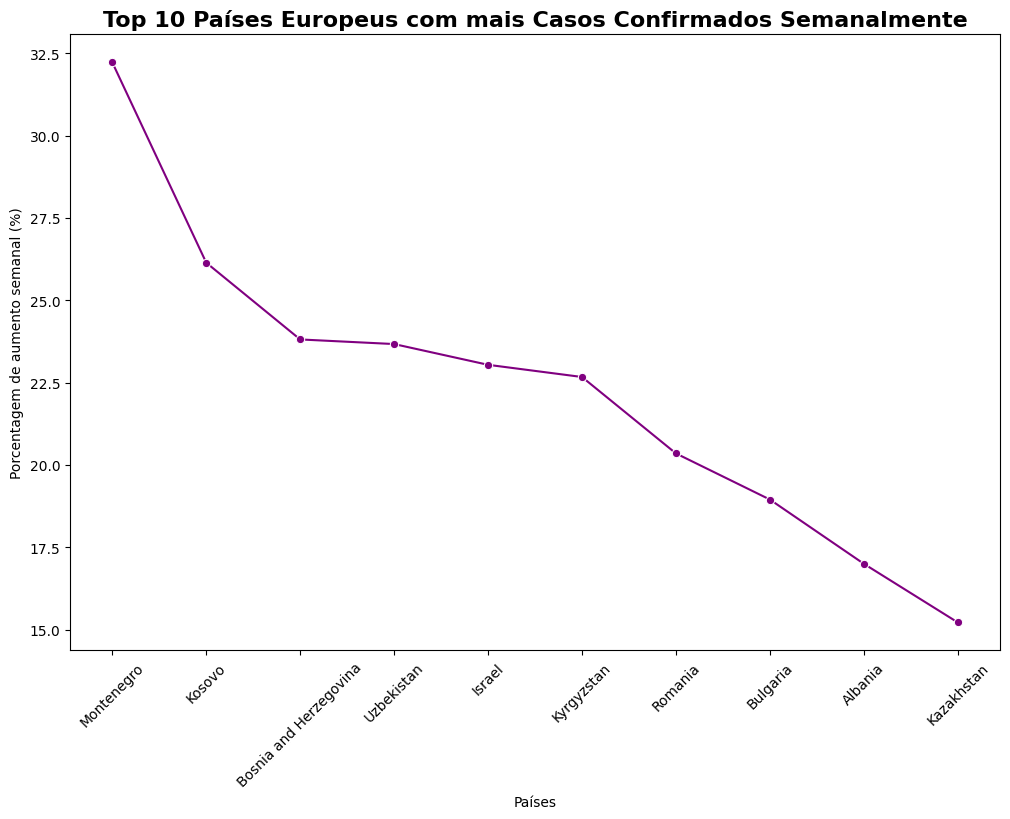

In [7]:
paises_europa = data[data['WHO Region'] == 'Europe']
paises_europa = paises_europa.nlargest(10, '1 week % increase')
plt.figure(figsize=(12, 8))
sns.lineplot(x='Country/Region', y='1 week % increase', data=paises_europa, marker='o', color="purple")
plt.title("Top 10 Países Europeus com mais Casos Confirmados Semanalmente", fontsize=16, fontweight='bold')
plt.xlabel("Países")
plt.ylabel("Porcentagem de aumento semanal (%)")
plt.xticks(rotation=45)
plt.show()

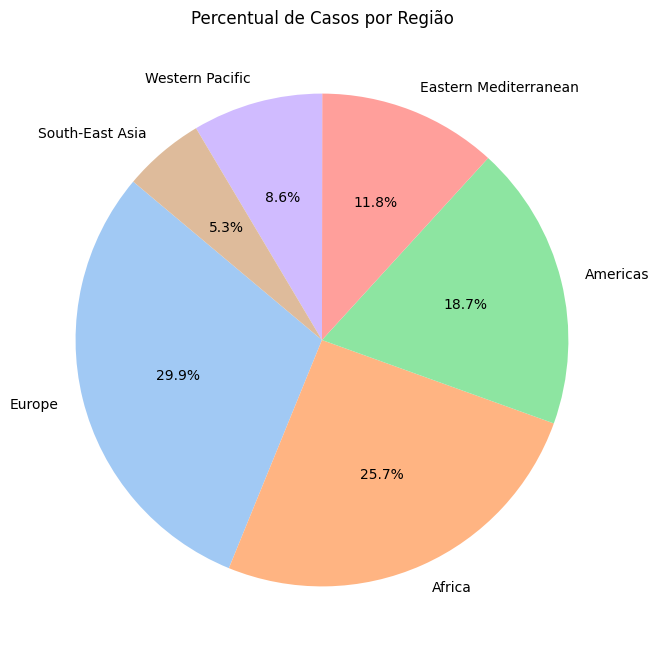

In [6]:
numero_regioes = data['WHO Region'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(numero_regioes, labels=numero_regioes.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Percentual de Casos por Região")
plt.show()

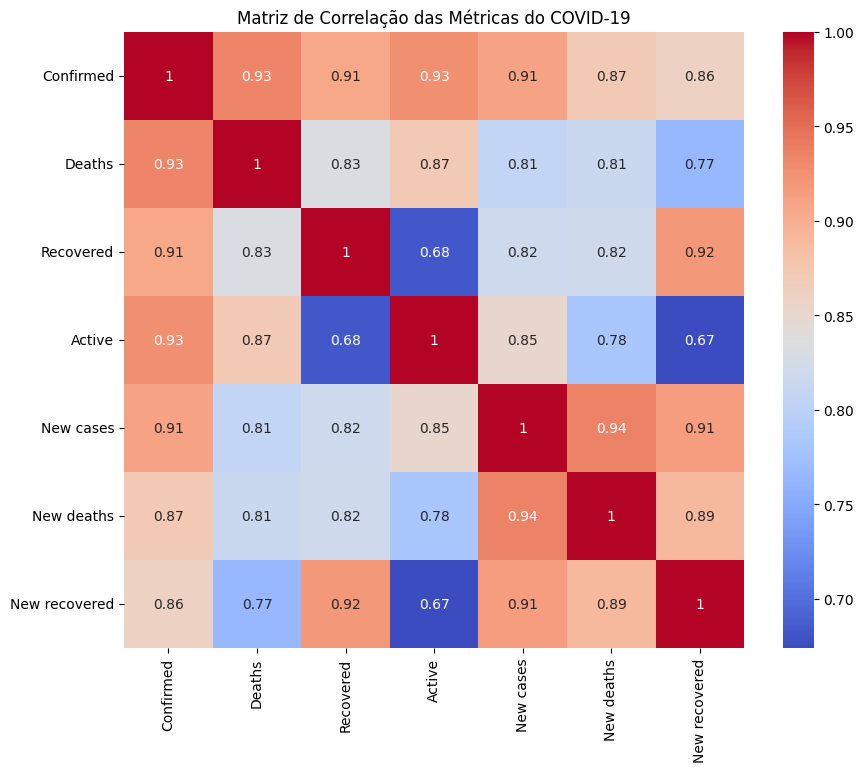

In [7]:
metricas_covid = data[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']]
matrix_correlacao = metricas_covid.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_correlacao, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação das Métricas do COVID-19")
plt.show()

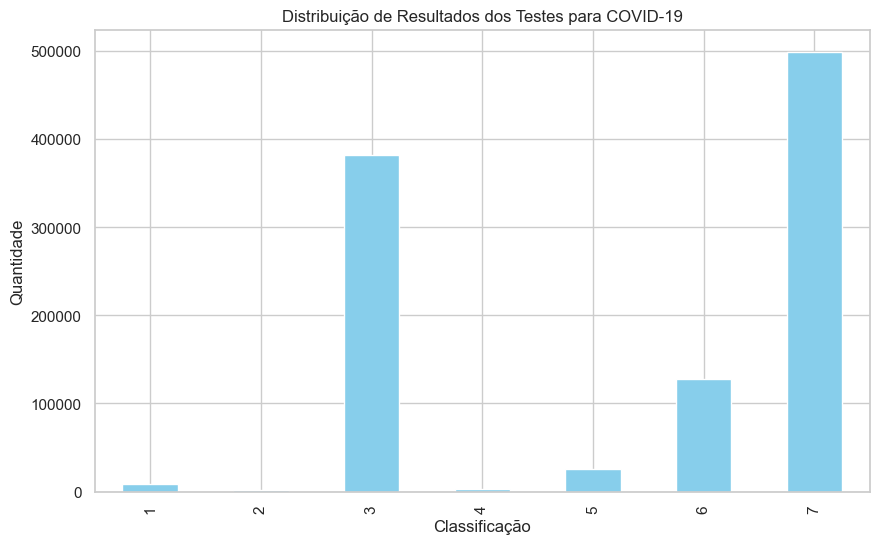

In [31]:
data2 = pd.read_csv('covid_data.csv')
data2.head()
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
data2['CLASIFFICATION_FINAL'].value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.title("Distribuição de Resultados dos Testes para COVID-19")
plt.xlabel("Classificação")
plt.ylabel("Quantidade")
plt.show()

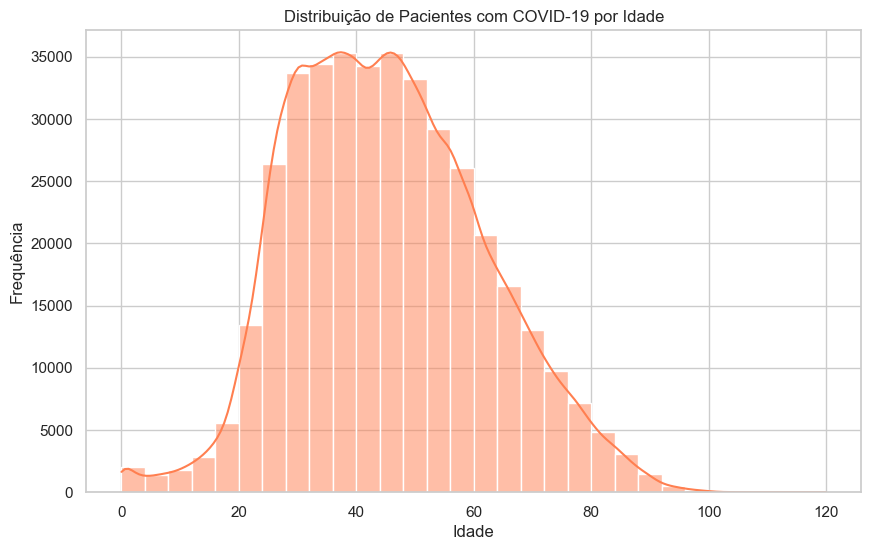

In [ ]:
covid_positive = data2[data2["CLASIFFICATION_FINAL"] < 4]
plt.figure(figsize=(10, 6))
sns.histplot(covid_positive["AGE"], bins=30, kde=True, color="coral")
plt.title("Distribuição de Pacientes com COVID-19 por Idade")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

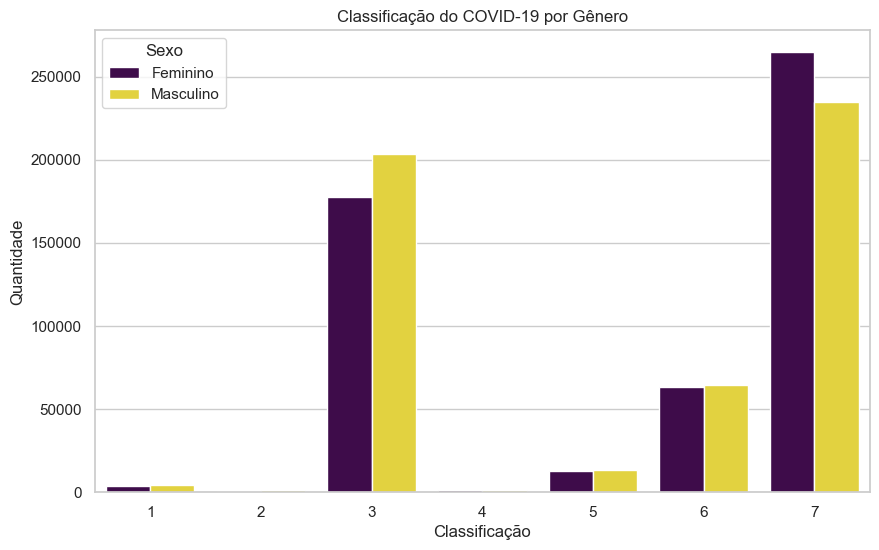

In [27]:
covid_data = data2.rename(columns=lambda x: x.strip())

plt.figure(figsize=(10, 6))
sns.countplot(data=covid_data, x='CLASIFFICATION_FINAL', hue='SEX', palette='viridis')
plt.title('Classificação do COVID-19 por Gênero')
plt.xlabel('Classificação')
plt.ylabel('Quantidade')
plt.legend(title='Sexo', labels=['Feminino', 'Masculino'])
plt.show()

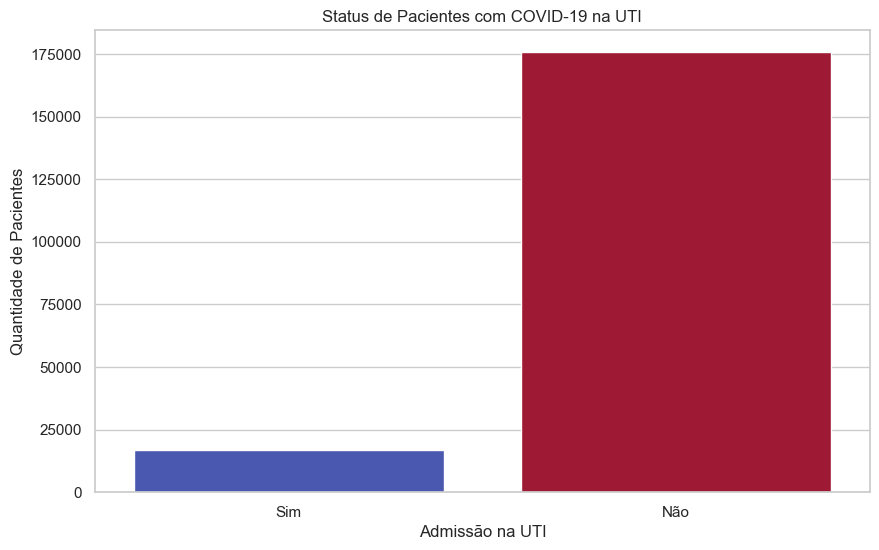

In [34]:
covid_data = covid_data.rename(columns=lambda x: x.strip())

covid_data_filtered = covid_data[covid_data["ICU"].isin([1, 2])]

plt.figure(figsize=(10, 6))
sns.countplot(data=covid_data_filtered, x="ICU", hue="ICU", palette="coolwarm", dodge=False, legend=False)
plt.title("Status de Pacientes com COVID-19 na UTI")
plt.xlabel("Admissão na UTI")
plt.ylabel("Quantidade de Pacientes")
plt.xticks([0, 1], ['Sim', 'Não'])
plt.show()


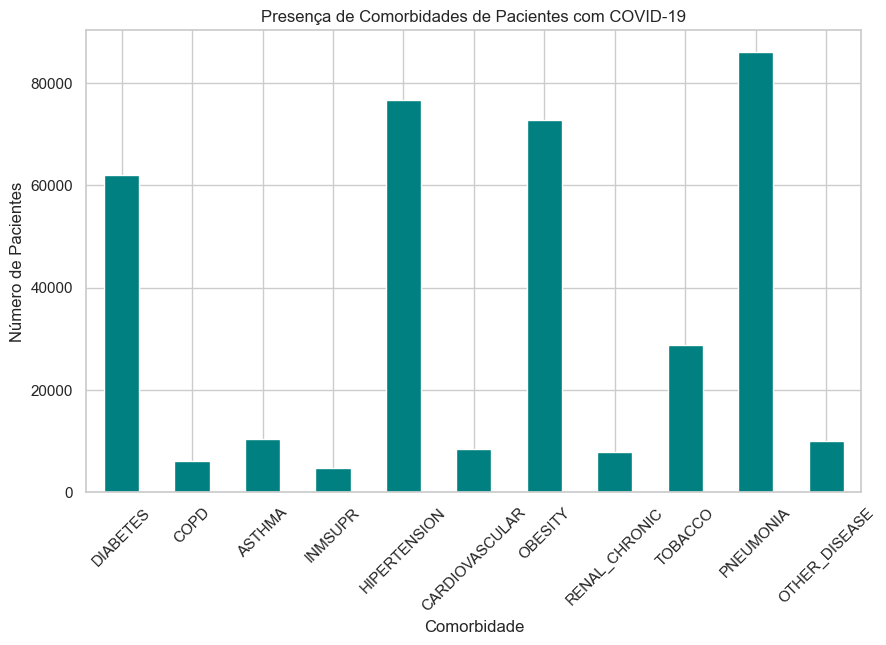

In [22]:
comorbidities = ["DIABETES", "COPD", "ASTHMA", "INMSUPR", "HIPERTENSION", "CARDIOVASCULAR", "OBESITY", "RENAL_CHRONIC", "TOBACCO", "PNEUMONIA", "OTHER_DISEASE"]
comorbidity_counts = covid_positive[comorbidities].apply(lambda x: (x == 1).sum())

plt.figure(figsize=(10, 6))
comorbidity_counts.plot(kind="bar", color="teal")
plt.title("Presença de Comorbidades de Pacientes com COVID-19")
plt.xlabel("Comorbidade")
plt.ylabel("Número de Pacientes")
plt.xticks(rotation=45)
plt.show()

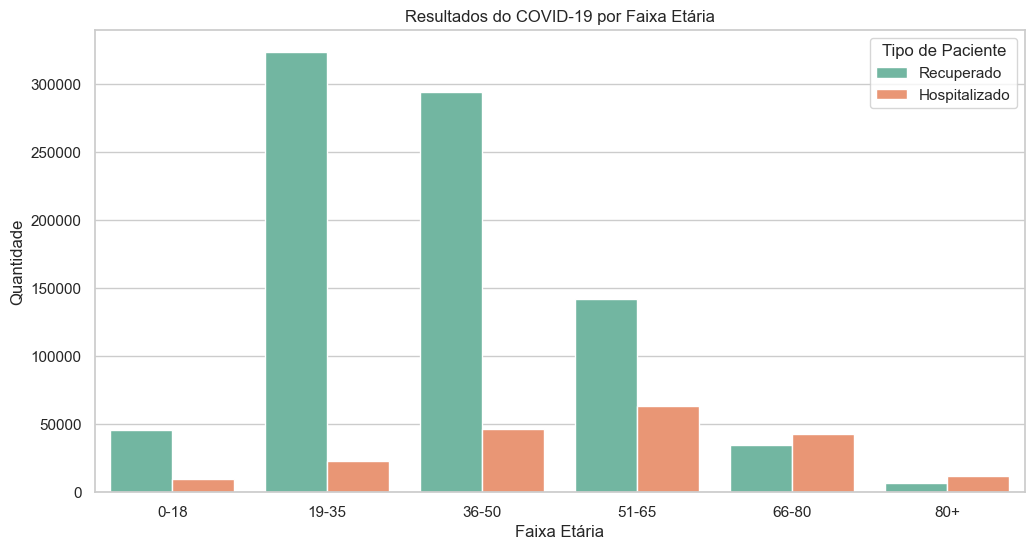

In [ ]:
covid_data['age_group'] = pd.cut(covid_data['AGE'], bins=[0, 18, 35, 50, 65, 80, 100], 
                                 labels=['0-18', '19-35', '36-50', '51-65', '66-80', '80+'])

plt.figure(figsize=(12, 6))
sns.countplot(data=covid_data, x='age_group', hue='PATIENT_TYPE', palette="Set2")
plt.title("Resultados do COVID-19 por Faixa Etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Quantidade")
plt.legend(title='Tipo de Paciente', labels=['Recuperado', 'Hospitalizado'])
plt.show()


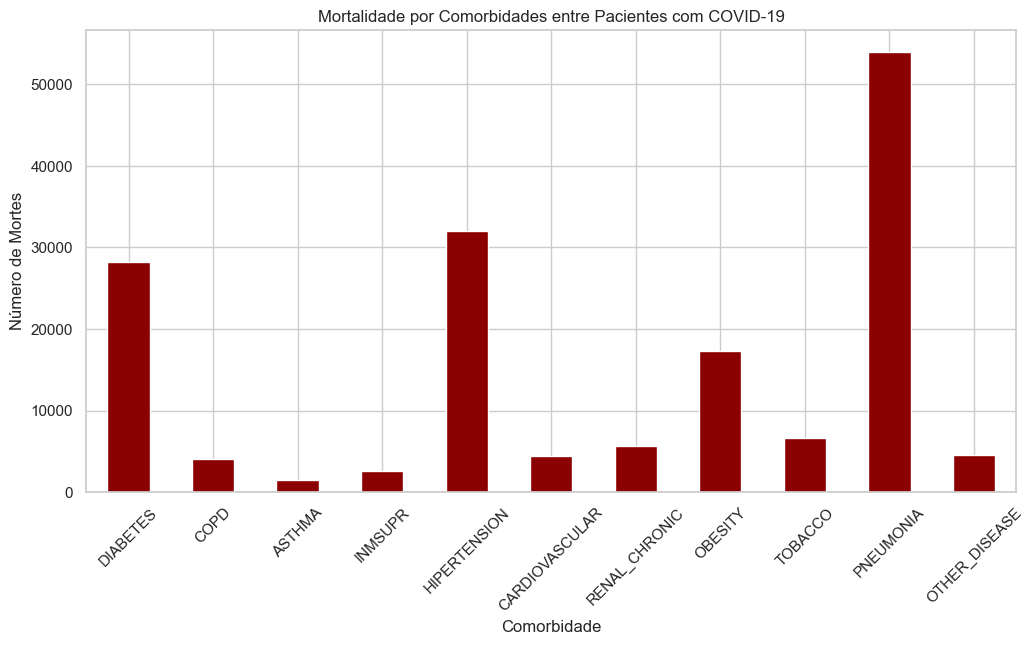

In [18]:
mortality_data = covid_data[covid_data['DATE_DIED'] != '9999-99-99']

mortality_conditions = ['DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 
                        'CARDIOVASCULAR', 'RENAL_CHRONIC', 'OBESITY', 'TOBACCO', 'PNEUMONIA', 'OTHER_DISEASE']

mortality_counts = mortality_data[mortality_conditions].apply(pd.Series.value_counts).loc[1].fillna(0)

plt.figure(figsize=(12, 6))
mortality_counts.plot(kind='bar', color="darkred")
plt.title("Mortalidade por Comorbidades entre Pacientes com COVID-19")
plt.xlabel("Comorbidade")
plt.ylabel("Número de Mortes")
plt.xticks(rotation=45)
plt.show()


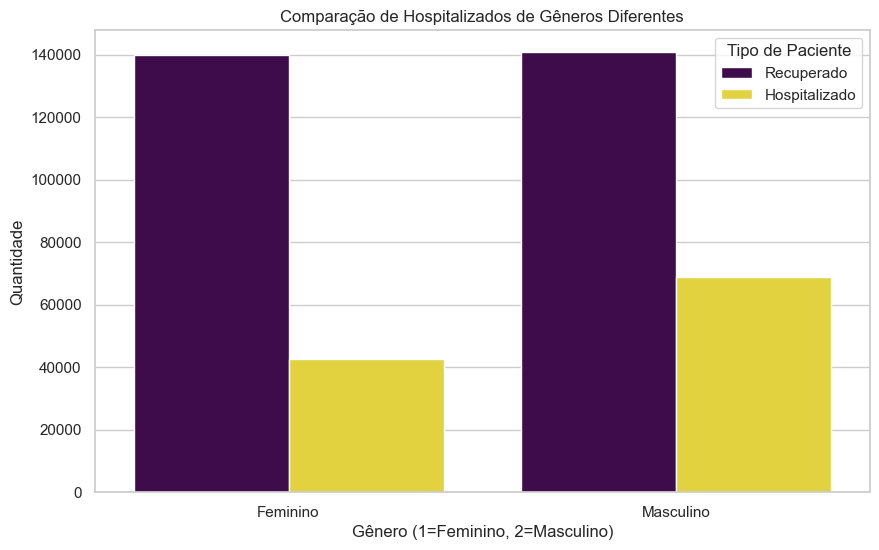

In [19]:
positive_cases = covid_data[(covid_data['CLASIFFICATION_FINAL'].isin([1, 2, 3])) & (covid_data['SEX'].isin([1, 2]))]

plt.figure(figsize=(10, 6))
sns.countplot(data=positive_cases, x="SEX", hue="PATIENT_TYPE", palette="viridis")
plt.title("Comparação de Hospitalizados de Gêneros Diferentes")
plt.xlabel("Gênero (1=Feminino, 2=Masculino)")
plt.ylabel("Quantidade")
plt.legend(title="Tipo de Paciente", labels=["Recuperado", "Hospitalizado"])
plt.xticks([0, 1], ['Feminino', 'Masculino'])
plt.show()